In [3]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [4]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [5]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


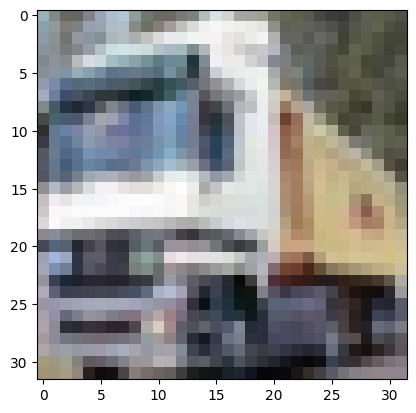

In [7]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [8]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# check model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [12]:
from keras.backend import one_hot
# train
history = model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10,validation_data = (x_test,one_hot_y_test), verbose=1)

Epoch 1/10
391/391 [==============================] - 24s 62ms/step - loss: 0.2763 - accuracy: 0.9089 - val_loss: 0.7939 - val_accuracy: 0.7766
Epoch 2/10
391/391 [==============================] - 24s 62ms/step - loss: 0.2293 - accuracy: 0.9236 - val_loss: 0.8520 - val_accuracy: 0.7688
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 0.1813 - accuracy: 0.9416 - val_loss: 0.9251 - val_accuracy: 0.7710
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1549 - accuracy: 0.9504 - val_loss: 1.0566 - val_accuracy: 0.7672
Epoch 5/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1463 - accuracy: 0.9533 - val_loss: 0.9516 - val_accuracy: 0.7733
Epoch 6/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1149 - accuracy: 0.9636 - val_loss: 0.9219 - val_accuracy: 0.7779
Epoch 7/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1103 - accuracy: 0.9656 - val_loss: 1.0623 - val_accuracy:

In [10]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 5s 127ms/step - loss: 0.9065 - accuracy: 0.7846


[0.9065383672714233, 0.784600019454956]

Printing the results
1. Confusion Matrix
2. Precision-recall curve

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

313/313 [==============================] - 3s 7ms/step


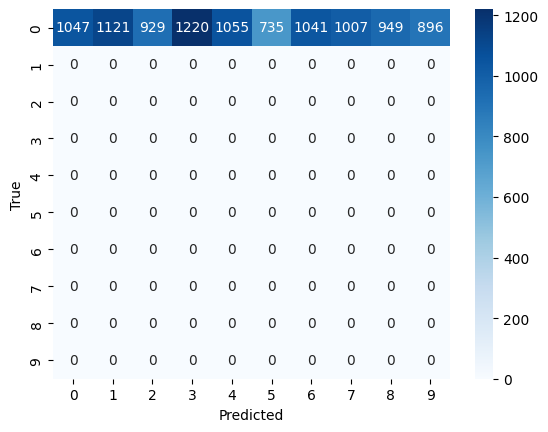

In [14]:
# Make predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

313/313 [==============================] - 2s 7ms/step


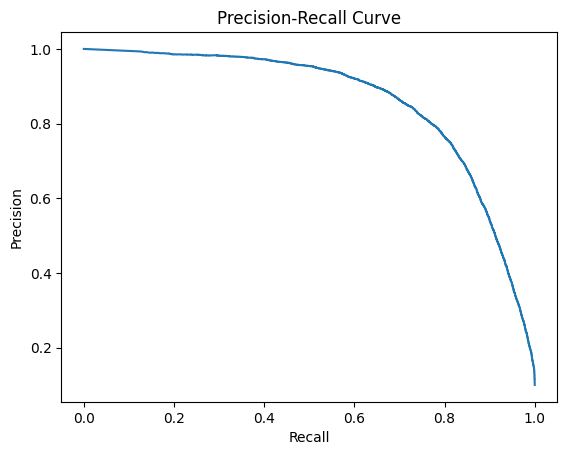

In [17]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities for test set
y_proba = model.predict(x_test)

one_hot_y_proba = keras.utils.to_categorical(y_proba,num_classes=num_classes)
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(one_hot_y_test.ravel(), y_proba.ravel())

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

1/1 [==============================] - 0s 20ms/step
predict class: 1
expected class: 1


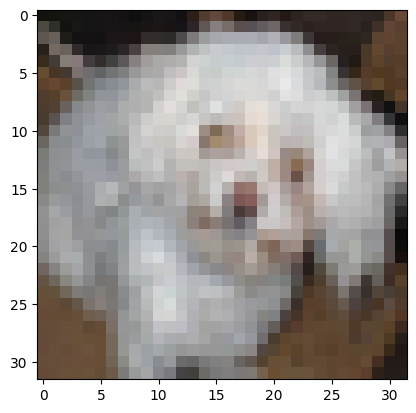

In [16]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1006:1007]).tolist()
predict = 0
expect = y_test[1006][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [ ]:
# save model
model.save("keras-VGG16-cifar10.h5")